## Прогнозирование факта пролонгации полиса

In [22]:
import random
d={'auto':100,
   'mobile':20,
   'keys':30
  }
def ret_cat(dict_):
    arr_res=[]
    for key, val in dict_.items():
        
        append_arr=[key]*val
        arr_res +=append_arr
    return arr_res[random.randint(0,len(arr_res)-1)]
d_=ret_cat(d)
d_

return - 'mobile'
-----------


def ret_cat(dict_):
    total_val = sum(i for i in dict_.values())
    proportion_of_total=[]
    all_keys=[]
    start=0
    for key, val in dict_.items():
        all_keys.append(key)
        start+=val/total_val
        proportion_of_total.append(start)
    print(proportion_of_total)
    rand= random.randint(0,total_val)/total_val
    print(rand)
    for i in range(len(all_keys)):
        if rand<=proportion_of_total[i]:
            print('find')
            return all_keys[i]
d_=ret_cat(d)
d_

[0.6666666666666666, 0.7999999999999999, 1.0]
0.47333333333333333
find

'auto'

dict_keys(['auto', 'mobile', 'keys'])

In [42]:

import random
d={'auto':100,
   'mobile':20,
   'keys':30
  }
def ret_cat(dict_):
    total_val = sum(i for i in dict_.values())
    proportion_of_total=[]
    all_keys=[]
    start=0
    for key, val in dict_.items():
        all_keys.append(key)
        start+=val/total_val
        proportion_of_total.append(start)
    print(proportion_of_total)
    rand= random.randint(0,total_val)/total_val
    print(rand)
    for i in range(len(all_keys)):
        if rand<=proportion_of_total[i]:
            print('find')
            return all_keys[i]
d_=ret_cat(d)
d_

[0.6666666666666666, 0.7999999999999999, 1.0]
0.47333333333333333
find


'auto'

Необходимо подготовить модель для прогнозирования пролонгации полиса клиента.

Содержание:
#### 1) <a href='#EDA'> Исследовательский анализ данных / предобработка</a>
- <a href='#describe'> Изучечние датасета</a>
    - <a href='#Preprocessing'> Предобработка</a>
    - <a href='#Vizualization'> Исследовательский анализ данных / визуализация</a>
    - <a href='#EDA conclusion'> Вывод по EDA</a>

    #### 2) <a href='#Model training'> Обучение модели</a>
    - <a href='#Ordinal Encoding'> Кодирование категориальных признаков</a>
    - <a href='#Traintestsplit'> Подготовка обучающей и тестовой выборок</a>
    - <a href='#Scaling'> Масштабирование</a>
    - <a href='#Results table'> Подготовка таблицы с результатами</a>
    - <a href='#Logistic Regression'> Logistic Regression</a>
    - <a href='#Random Forest'> Random Forest</a>
    - <a href='#XGBoost'> XGBoost</a>
    - <a href='#Logistic Regression + XGBoost'> Logistic Regression + XGBoost</a>

    #### 3) <a href='#Conclusion'> Вывод</a>

<a id='EDA'></a>
## Исследовательский анализ данных / предобработка

In [90]:
#analyse
import pandas as pd
import numpy as np


# prepare data
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

from sklearn.utils import shuffle


#processing
from sklearn.pipeline import Pipeline


#Quality control
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


#Models
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import Pool, CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection,linear_model, preprocessing, ensemble, metrics, svm
from hyperopt import fmin, tpe, hp, space_eval

#scaller
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
        from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer

#encoder
import category_encoders as ce
from category_encoders.cat_boost import CatBoostEncoder


#fill nan
from sklearn.impute import SimpleImputer


## visualise
import seaborn as sns
import matplotlib.pyplot as plt


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
path='/Users/nikli/Documents/git_reps/Data/'
churn_data = pd.read_csv(path+'Task_data_renn.txt', sep=';')  #Описание массива - Ренессанс.csv

<a id='describe'></a>
### Изучечние датасета

In [4]:
print('Train dataset')
display(churn_data)
# print('Test dataset')
# display(test_data)


Train dataset


,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96600,TRAIN,96601,3,3,1,55,6,Москва,38,6,...,N,1,1,0,0.0,0,0,0.0,Московская,-0.14
96601,TRAIN,96602,4,3,1,50,5,Санкт-Петербург,30,6,...,0,1,1,0,0.0,0,1,0.0,Санкт-Петербург,0.00
96602,TRAIN,96603,3,3,1,50,5,Москва,59,31,...,0,1,1,0,3.0,0,2,0.0,Москва,-0.22
96603,TRAIN,96604,3,3,1,52,6,Москва,41,19,...,0,0,1,0,0.0,0,1,0.0,Московская,0.04


In [96]:
churn_data['DATA_TYPE'].value_counts()

TRAIN    77407
TEST     19198
Name: DATA_TYPE, dtype: int64

### Описание полей

Наименование поля	Описание поля
1. DATA_TYPE	                    Тип выборки
2. POLICY_ID	                    ID полиса
3. POLICY_BEGIN_MONTH	            Месяц начала действия полиса
4. POLICY_END_MONTH    	            Месяц окончания действия полиса
5. POLICY_IS_RENEWED	            Факт пролонгации полиса. Прогнозируемый параметр
6. POLICY_SALES_CHANNEL	            Канал продаж полиса
7. POLICY_SALES_CHANNEL_GROUP	    Группа каналов продаж (группировка для колонки - канал продаж полиса) 
8. POLICY_BRANCH	                Филиал продажи полиса
9. POLICY_MIN_AGE	                Минимальный возраст лиц допущенных к управлению по полису
10. POLICY_MIN_DRIVING_EXPERIENCE	Минимальный стаж вождения лиц допущенных к управлению по полису
11. VEHICLE_MAKE	                Марка ТС
12. VEHICLE_MODEL	                Модель ТС
13. VEHICLE_ENGINE_POWER	        Мощность двигателя ТС
14. VEHICLE_IN_CREDIT	            ТС куплено в кредит
15. VEHICLE_SUM_INSURED	            Страховая сумма по полису (оценочная стоимость ТС - лимит возмещения)
16. POLICY_INTERMEDIARY	            Посредник по полису
17. INSURER_GENDER	                Пол страхователя
18. POLICY_CLM_N	                Кол-во убытков, всего по данному полису
19. POLICY_CLM_GLT_N	            Кол-во убытков, где клиент виновен в ДТП по данному полису
20. POLICY_PRV_CLM_N	            Кол-во убытков, всего по предыдущему (если есть) полису (клиент пролонгируется второй и                                         более раз)
21. POLICY_PRV_CLM_GLT_N	        Кол-во убытков, где клиент виновен в ДТП по предыдущему полису (клиент пролонгируется                                           второй и более 2. раз)
22. CLIENT_HAS_DAGO	                У клиента также есть полис ДАГО (ДАГО - расширение для страхования ответственности)
23. CLIENT_HAS_OSAGO	            У клиента также есть полис ОСАГО
24. POLICY_COURT_SIGN	            По полису был суд
25. CLAIM_AVG_ACC_ST_PRD	        Среднее время от страхового случая до заявления убытков по данному полису
26. POLICY_HAS_COMPLAINTS	        По полису были жалобы (в том числе при урегулировании убытков)
27. POLICY_YEARS_RENEWED_N	        Количество лет пролонгации полиса
28. POLICY_DEDUCT_VALUE	            Сумма франшизы по полису
29. CLIENT_REGISTRATION_REGION	    Регион регистрации страхователя
30. POLICY_PRICE_CHANGE	            "Как поменялась премия при пролонгации  (""цена предложенная при пролонгации""-""цена                                           пролонгируемого полиса"")/""цена пролонгируемого полиса"""


In [7]:
churn_data.describe()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE
count,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,9.660500e+04,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000
mean,48303.000000,6.891393,6.870400,0.500761,47.345251,5.123265,42.580767,34.910357,154.195851,0.321950,9.806700e+05,0.277480,0.550303,0.001014,3.877110,0.007660,5974.134461,-0.033025
std,27887.605715,3.400597,3.403665,0.500002,14.034159,1.585213,10.694670,199.928966,54.117543,0.467226,6.900919e+05,0.447758,0.497466,0.031834,17.635091,0.087186,10418.697183,0.857995
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,24152.000000,4.000000,4.000000,0.000000,50.000000,5.000000,34.000000,8.000000,123.000000,0.000000,5.584960e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.170000
50%,48303.000000,7.000000,7.000000,1.000000,52.000000,6.000000,41.000000,14.000000,146.000000,0.000000,8.090000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72454.000000,10.000000,10.000000,1.000000,53.000000,6.000000,50.000000,19.000000,171.000000,1.000000,1.163900e+06,1.000000,1.000000,0.000000,0.000000,0.000000,10000.000000,0.050000
max,96605.000000,12.000000,12.000000,1.000000,63.000000,8.000000,86.000000,2015.000000,2000.000000,1.000000,9.449000e+06,1.000000,1.000000,1.000000,737.000000,1.000000,120873.000000,60.020000


In [8]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96605 entries, 0 to 96604
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATA_TYPE                      96605 non-null  object 
 1   POLICY_ID                      96605 non-null  int64  
 2   POLICY_BEGIN_MONTH             96605 non-null  int64  
 3   POLICY_END_MONTH               96605 non-null  int64  
 4   POLICY_IS_RENEWED              96605 non-null  int64  
 5   POLICY_SALES_CHANNEL           96605 non-null  int64  
 6   POLICY_SALES_CHANNEL_GROUP     96605 non-null  int64  
 7   POLICY_BRANCH                  96605 non-null  object 
 8   POLICY_MIN_AGE                 96605 non-null  int64  
 9   POLICY_MIN_DRIVING_EXPERIENCE  96605 non-null  int64  
 10  VEHICLE_MAKE                   96605 non-null  object 
 11  VEHICLE_MODEL                  96605 non-null  object 
 12  VEHICLE_ENGINE_POWER           96605 non-null 

In [5]:
churn_data[['POLICY_BRANCH','VEHICLE_MAKE','VEHICLE_MODEL','POLICY_INTERMEDIARY','INSURER_GENDER','POLICY_CLM_N',
            'POLICY_CLM_N','POLICY_CLM_GLT_N','POLICY_PRV_CLM_N','POLICY_PRV_CLM_GLT_N','POLICY_YEARS_RENEWED_N',
            'CLIENT_REGISTRATION_REGION','POLICY_SALES_CHANNEL','POLICY_SALES_CHANNEL_GROUP']]

,POLICY_BRANCH,VEHICLE_MAKE,VEHICLE_MODEL,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,POLICY_YEARS_RENEWED_N,CLIENT_REGISTRATION_REGION,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP
0,Москва,Land Rover,Discovery,856,F,0,0,0,N,N,0,Тульская,39,1
1,Москва,Opel,Zafira,N,M,0,0,0,0,0,4,Москва,50,5
2,Москва,Kia,Soul,N,F,0,0,0,1L,1L,1,Московская,52,6
3,Москва,Citroen,C-Crosser,N,M,0,0,0,0,0,6,Москва,50,5
4,Санкт-Петербург,Renault,Logan,171,F,0,0,0,N,N,0,Ленинградская,52,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96600,Москва,Ford,Mondeo,1096,M,0,0,0,N,N,0,Московская,55,6
96601,Санкт-Петербург,Mercedes-Benz,GL,N,M,0,0,0,0,0,1,Санкт-Петербург,50,5
96602,Москва,Opel,Meriva,N,M,1S,1S,1S,0,0,2,Москва,50,5
96603,Москва,Toyota,Land Cruiser Prado,910,M,0,0,0,0,0,1,Московская,52,6


In [6]:
# churn_data.isnull().sum()
churn_data.isna().sum().sum() # Данные без пропусков

0

<a id='Preprocessing'></a>
### Предобработка

1) Столбцы POLICY_BEGIN_MONTH & POLICY_END_MONTH на первый взгляд почти одинаковы, нужно предобработать эти столбцы:

In [7]:
lengh_policy=pd.DataFrame()
lengh_policy['len_time_policy']=churn_data['POLICY_BEGIN_MONTH']-churn_data['POLICY_END_MONTH']
lengh_policy['POLICY_END_MONTH']=churn_data['POLICY_END_MONTH']
lengh_policy['POLICY_BEGIN_MONTH']=churn_data['POLICY_BEGIN_MONTH']
lengh_policy['POLICY_IS_RENEWED']=churn_data['POLICY_IS_RENEWED']
lengh_policy.head(3)

,len_time_policy,POLICY_END_MONTH,POLICY_BEGIN_MONTH,POLICY_IS_RENEWED
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1


In [8]:
pd.crosstab(lengh_policy['POLICY_IS_RENEWED'], lengh_policy['len_time_policy'], normalize=True)

len_time_policy,-11,-10,-8,-7,-6,-5,0,1,3,4,5,6
POLICY_IS_RENEWED,,,,,,,,,,,,
0,0.000072,0.00001,0.000031,0.000072,0.000207,0.00001,0.487294,0.011428,0.00001,0.00001,0.00001,0.000083
1,0.000021,0.00000,0.000000,0.000000,0.000010,0.00000,0.488546,0.012184,0.00000,0.00000,0.00000,0.000000


In [9]:
lengh_policy[lengh_policy['len_time_policy']==6]

,len_time_policy,POLICY_END_MONTH,POLICY_BEGIN_MONTH,POLICY_IS_RENEWED
193,6,1,7,0
4092,6,4,10,0
7330,6,4,10,0
10472,6,4,10,0
26024,6,3,9,0
36652,6,2,8,0
70941,6,3,9,0
90904,6,5,11,0


In [10]:
pd.crosstab(lengh_policy['POLICY_IS_RENEWED'], lengh_policy['POLICY_BEGIN_MONTH'], normalize=True)

POLICY_BEGIN_MONTH,1,2,3,4,5,6,7,8,9,10,11,12
POLICY_IS_RENEWED,,,,,,,,,,,,
0,0.026210,0.032007,0.047741,0.048165,0.029460,0.026655,0.029429,0.078091,0.037565,0.042845,0.043165,0.057906
1,0.026407,0.035536,0.048341,0.052616,0.034729,0.032348,0.034139,0.071239,0.033735,0.041002,0.040143,0.050525


In [11]:
churn_data['IS_SAME_MONTH']=churn_data.apply(lambda r: 1 if r['POLICY_BEGIN_MONTH']-r['POLICY_END_MONTH'] == 0 else 0, axis=1)

In [12]:
del churn_data['POLICY_END_MONTH']

<a id='Vizualization'></a>
### Исследовательский анализ данных / визуализация

In [13]:
train_data=churn_data[churn_data['DATA_TYPE']=='TRAIN']
test_data=churn_data[churn_data['DATA_TYPE']!='TRAIN']

In [14]:
numeric_cols=['POLICY_MIN_AGE','POLICY_MIN_DRIVING_EXPERIENCE','VEHICLE_ENGINE_POWER','VEHICLE_SUM_INSURED','POLICY_CLM_N',
              'POLICY_CLM_GLT_N','POLICY_PRV_CLM_N','POLICY_PRV_CLM_GLT_N','CLAIM_AVG_ACC_ST_PRD','POLICY_YEARS_RENEWED_N',
              'POLICY_DEDUCT_VALUE','POLICY_PRICE_CHANGE','POLICY_IS_RENEWED']


cat_cols=['POLICY_BEGIN_MONTH','POLICY_BRANCH','VEHICLE_MAKE','VEHICLE_MODEL','POLICY_INTERMEDIARY','INSURER_GENDER',
          'VEHICLE_IN_CREDIT','CLIENT_HAS_DAGO','CLIENT_HAS_OSAGO','POLICY_COURT_SIGN','POLICY_HAS_COMPLAINTS',''
          'CLIENT_REGISTRATION_REGION','POLICY_SALES_CHANNEL','POLICY_SALES_CHANNEL_GROUP',
          'POLICY_IS_RENEWED']

#### Распрпеделения по численным признакам

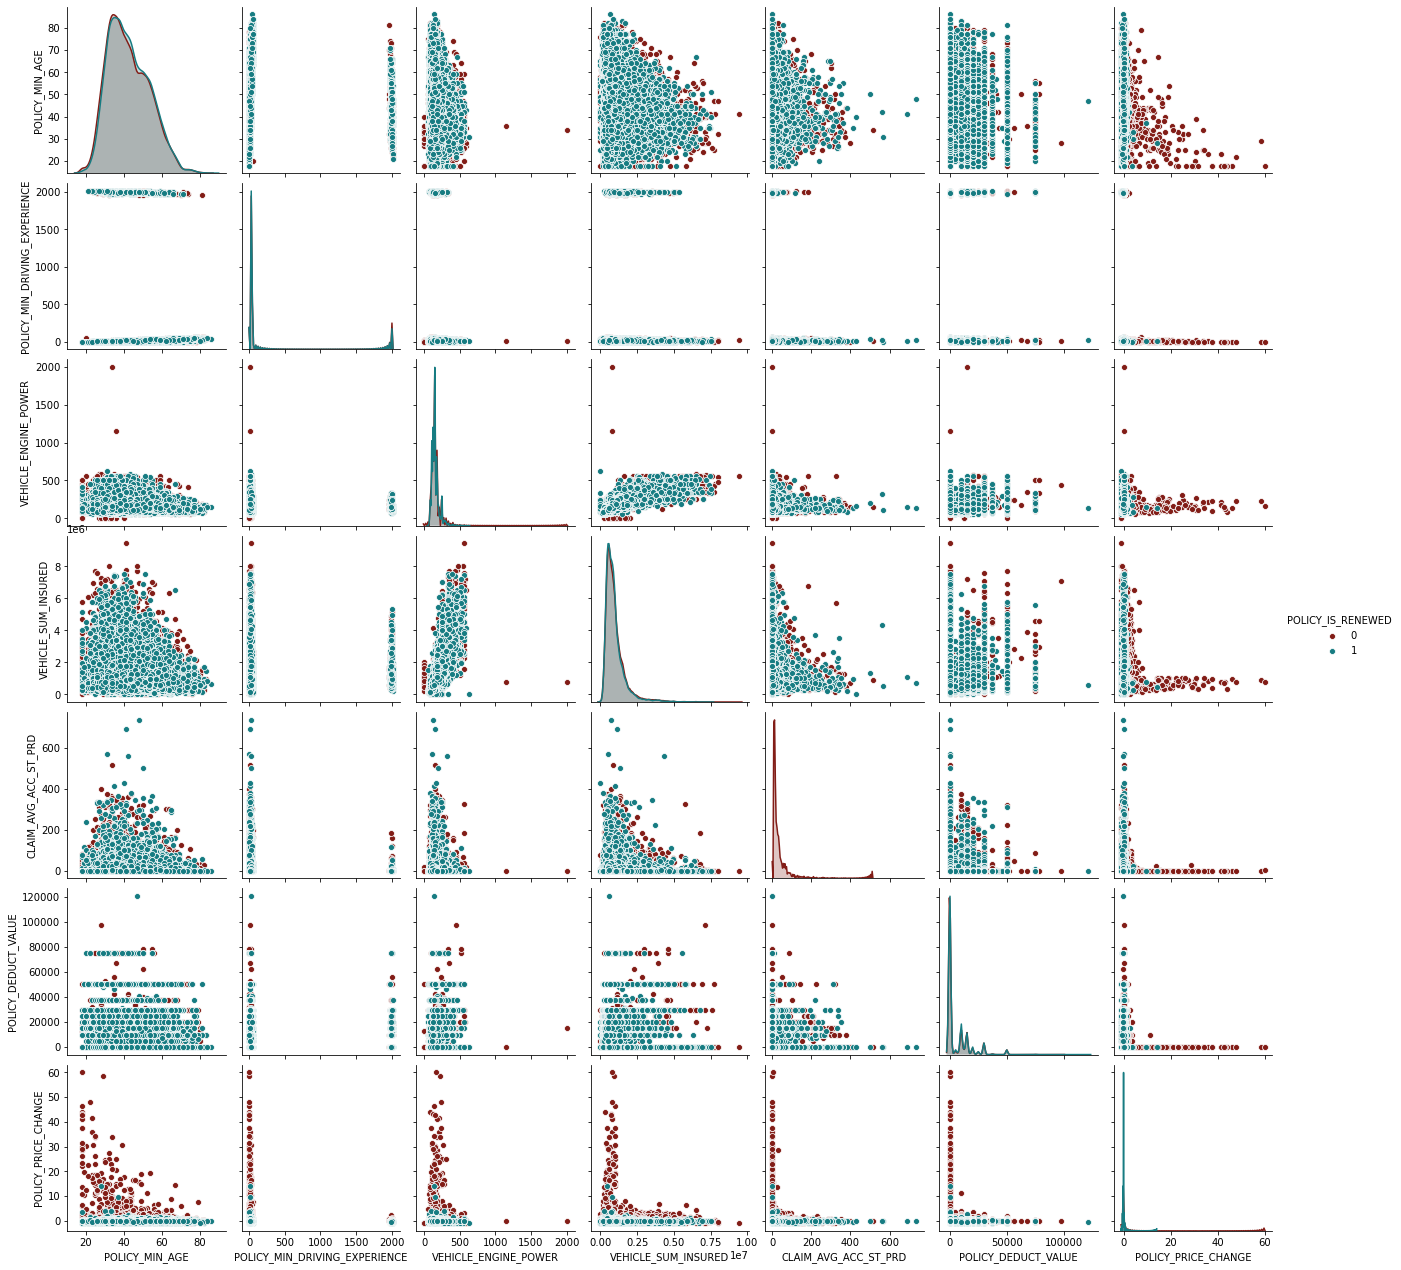

In [19]:
sns.pairplot(churn_data[numeric_cols], hue='POLICY_IS_RENEWED',palette = sns.hls_palette(2, l=.3, s=.7));

#### Распределения по категориальным признакам

In [20]:
churn_data[cat_cols].head(3)

,POLICY_BEGIN_MONTH,POLICY_BRANCH,VEHICLE_MAKE,VEHICLE_MODEL,POLICY_INTERMEDIARY,INSURER_GENDER,VEHICLE_IN_CREDIT,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,POLICY_HAS_COMPLAINTS,CLIENT_REGISTRATION_REGION,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_IS_RENEWED
0,1,Москва,Land Rover,Discovery,856,F,0,1,0,0,0,Тульская,39,1,1
1,1,Москва,Opel,Zafira,N,M,0,1,1,0,0,Москва,50,5,1
2,1,Москва,Kia,Soul,N,F,0,0,0,0,0,Московская,52,6,1


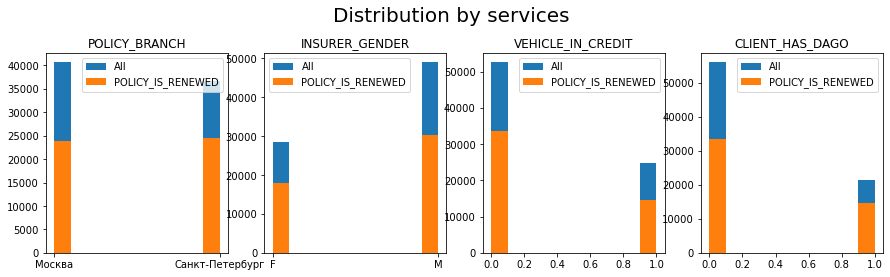

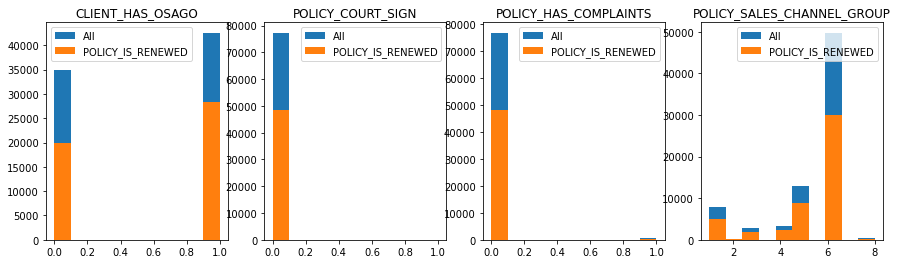

In [23]:
train_data=churn_data[churn_data['DATA_TYPE']=='TRAIN']
test_data=churn_data[churn_data['DATA_TYPE']!='TRAIN']
small_cat=[]
big_cat=[]
for i in range(len(cat_cols)):
    if len(train_data[cat_cols[i]].unique()) < 10:
        small_cat.append(cat_cols[i])
    else:
        big_cat.append(cat_cols[i])
    
small_cat=['POLICY_BRANCH',
           'INSURER_GENDER',
           'VEHICLE_IN_CREDIT',
           'CLIENT_HAS_DAGO',
           'CLIENT_HAS_OSAGO',
           'POLICY_COURT_SIGN',
           'POLICY_HAS_COMPLAINTS',
           'POLICY_SALES_CHANNEL_GROUP',
           'POLICY_IS_RENEWED']

fig, ax = plt.subplots(1, 4, figsize=(15, 4))

ax[0].hist(train_data['POLICY_BRANCH'])
ax[0].hist(train_data[train_data['POLICY_IS_RENEWED'] == 1]['POLICY_BRANCH'])
ax[0].set_title('POLICY_BRANCH')
ax[1].hist(train_data['INSURER_GENDER'])
ax[1].hist(train_data[train_data['POLICY_IS_RENEWED'] == 1]['INSURER_GENDER'])
ax[1].set_title('INSURER_GENDER')
ax[2].hist(train_data['VEHICLE_IN_CREDIT'])
ax[2].hist(train_data[train_data['POLICY_IS_RENEWED'] == 1]['VEHICLE_IN_CREDIT'])
ax[2].set_title('VEHICLE_IN_CREDIT')
ax[3].hist(train_data['CLIENT_HAS_DAGO'])
ax[3].hist(train_data[train_data['POLICY_IS_RENEWED'] == 1]['CLIENT_HAS_DAGO'])
ax[3].set_title('CLIENT_HAS_DAGO')

for i in range(4):
    ax[i].legend(['All', 'POLICY_IS_RENEWED'])

fig.suptitle('Distribution by services', fontsize=20)
fig.subplots_adjust(top=0.82)
    
fig, ax = plt.subplots(1, 4, figsize=(15, 4))

ax[0].hist(train_data['CLIENT_HAS_OSAGO'])
ax[0].hist(train_data[train_data['POLICY_IS_RENEWED'] == 1]['CLIENT_HAS_OSAGO'])
ax[0].set_title('CLIENT_HAS_OSAGO')
ax[1].hist(train_data['POLICY_COURT_SIGN'])
ax[1].hist(train_data[train_data['POLICY_IS_RENEWED'] == 1]['POLICY_COURT_SIGN'])
ax[1].set_title('POLICY_COURT_SIGN')
ax[2].hist(train_data['POLICY_HAS_COMPLAINTS'])
ax[2].hist(train_data[train_data['POLICY_IS_RENEWED'] == 1]['POLICY_HAS_COMPLAINTS'])
ax[2].set_title('POLICY_HAS_COMPLAINTS')
ax[3].hist(train_data['POLICY_SALES_CHANNEL_GROUP'])
ax[3].hist(train_data[train_data['POLICY_IS_RENEWED'] == 1]['POLICY_SALES_CHANNEL_GROUP'])
ax[3].set_title('POLICY_SALES_CHANNEL_GROUP')

for i in range(4):
    ax[i].legend(['All', 'POLICY_IS_RENEWED'])

Выводы: категориальные признаки почти везде равномерно распределены между классами. Предположение- канал продаж полиса, в редких каналах преобладают пользователи с пролонгациованным полисом

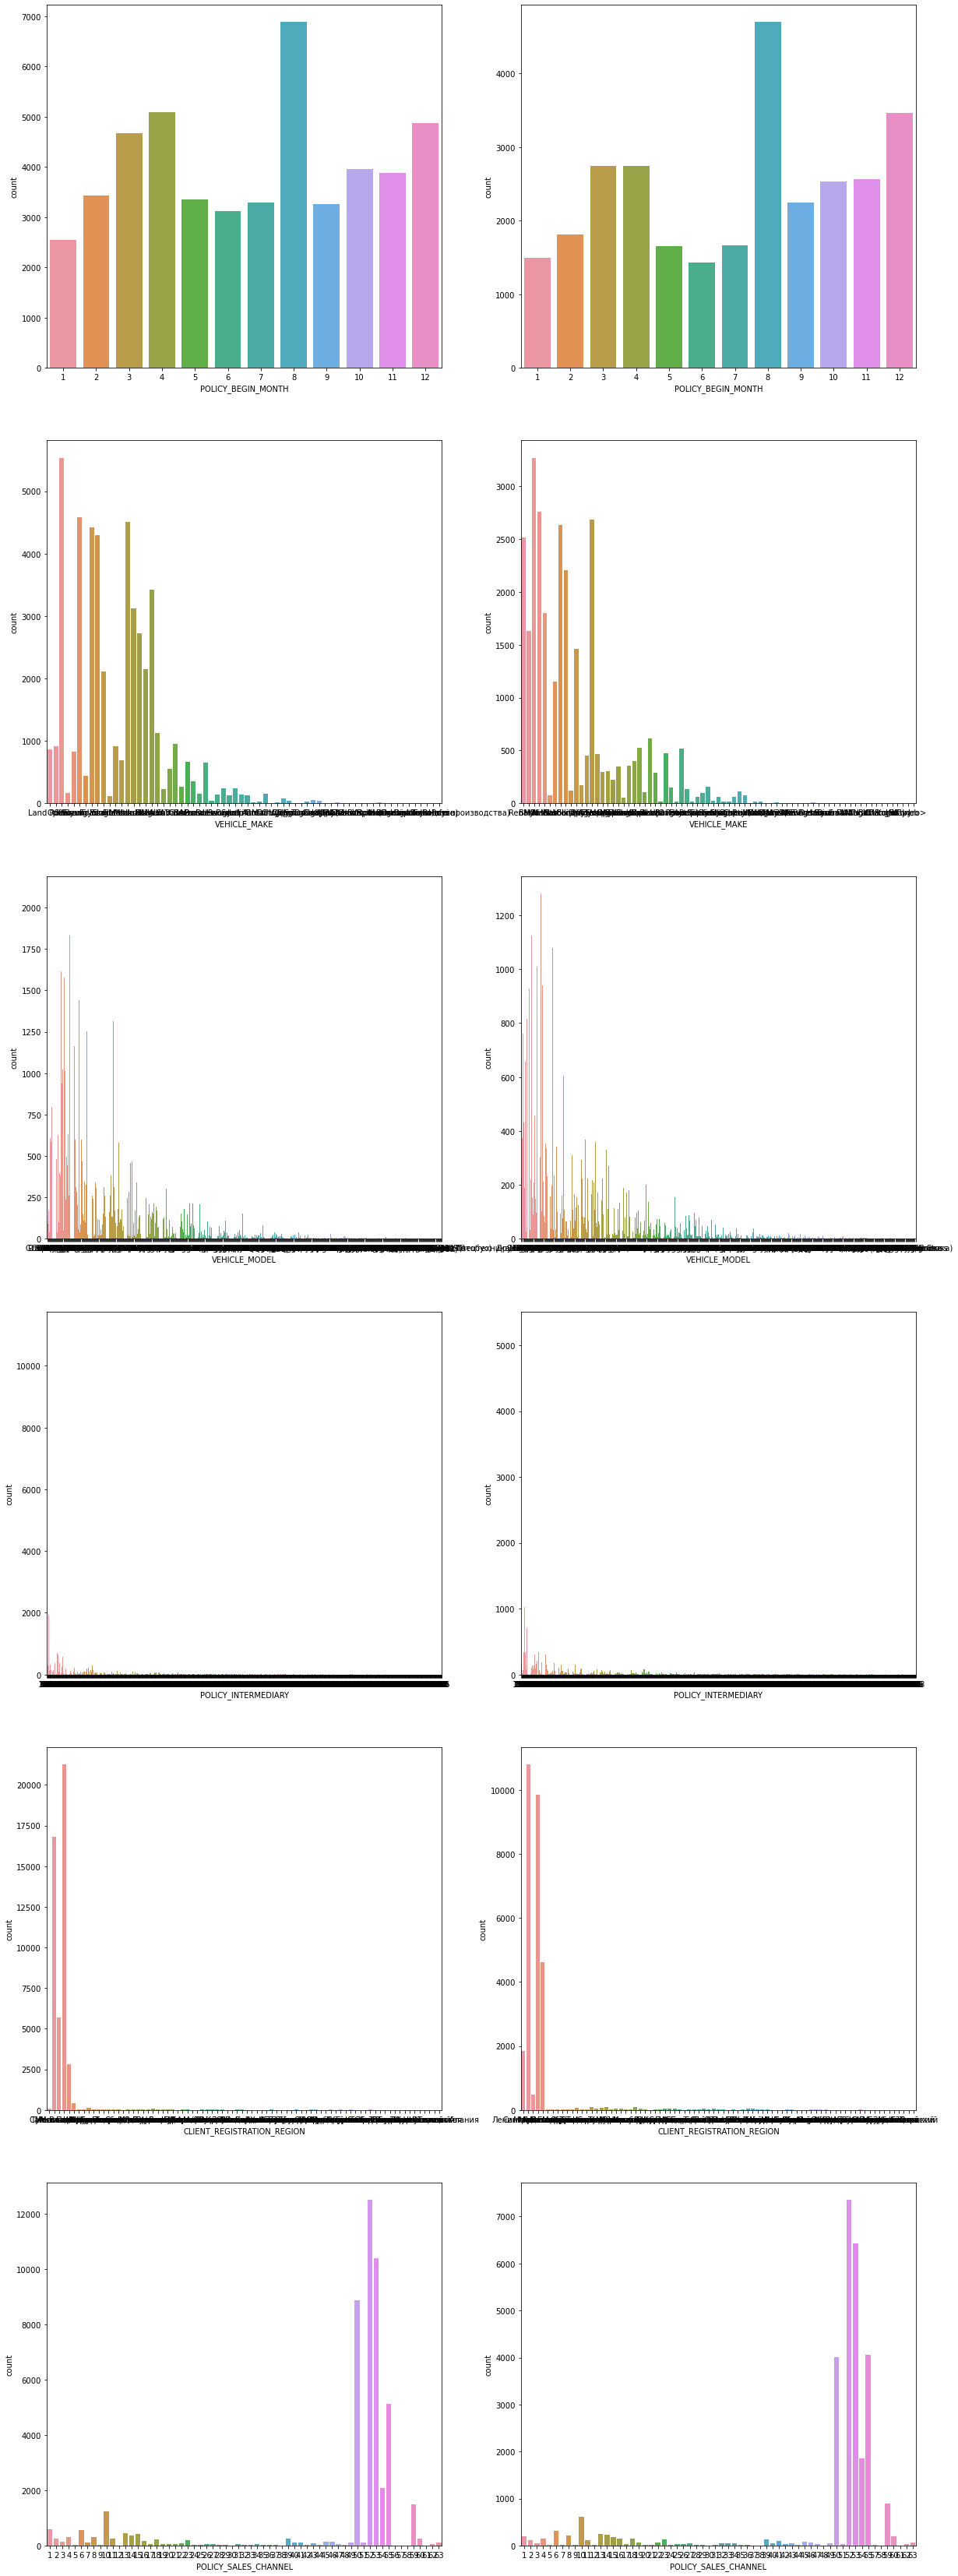

In [150]:
fig, axs = plt.subplots(6,2, figsize = (20,60))
for y in range(6):
    sns.countplot(x=train_data[big_cat].iloc[:, y][train_data['POLICY_IS_RENEWED'] == 1], ax = axs[y,0])
    sns.countplot(x=train_data[big_cat].iloc[:, y][train_data['POLICY_IS_RENEWED'] == 0], ax = axs[y,1])

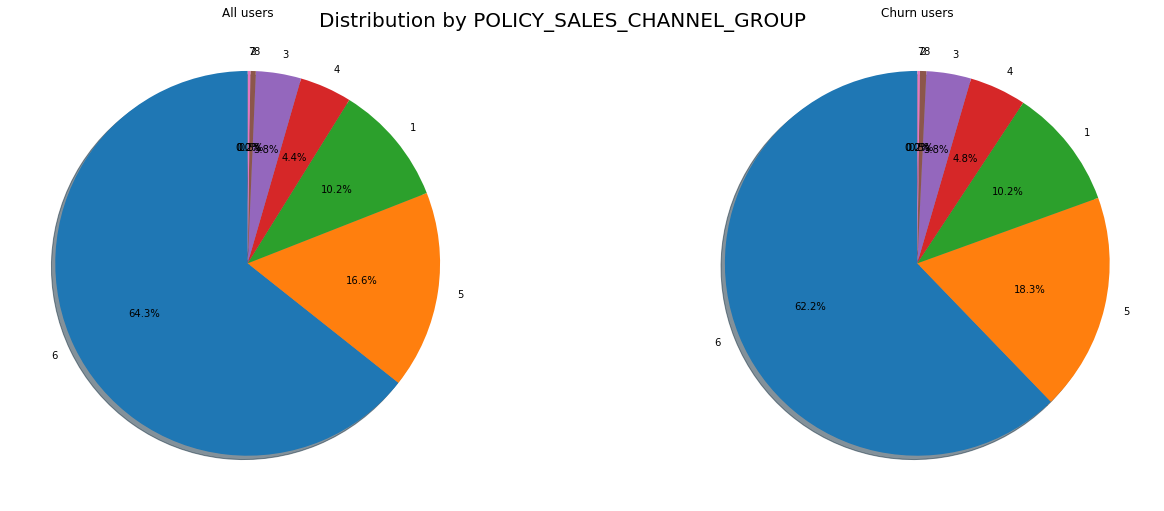

In [24]:
pie_user_type = pd.DataFrame(train_data['POLICY_SALES_CHANNEL_GROUP'].value_counts(normalize=True)*100)
pie_user_type.columns = ['All users']
pie_user_type['Churn users'] = train_data[train_data['POLICY_IS_RENEWED'] == 1]['POLICY_SALES_CHANNEL_GROUP'].value_counts(normalize=True)*100

fig, ax = plt.subplots(1, 2, figsize=(22, 8))

ax[0].pie(pie_user_type['All users'], labels=pie_user_type.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[0].set_title('All users')
ax[1].pie(pie_user_type['Churn users'], labels=pie_user_type.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].set_title('Churn users')

fig.suptitle('Distribution by POLICY_SALES_CHANNEL_GROUP', fontsize=20)
fig.subplots_adjust(top=0.96)

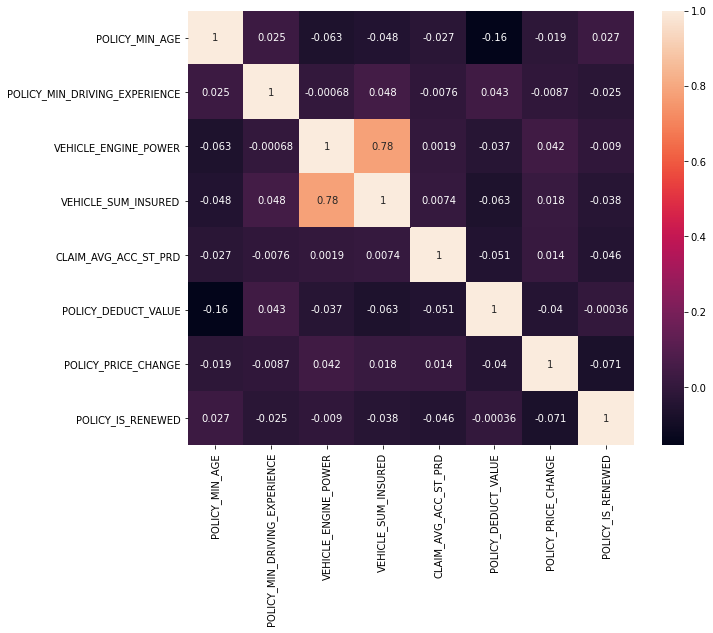

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numeric_cols].corr(), annot=True);

Вывод: Признаки vehicle engine power & vehicle sum inferno - сильно коррелируют между собой, что логично. Однако эти признаки не линейно зависимы, каждый признак несёт уникальную информацию, их стоит оставить.

<a id='EDA conclusion'></a>
### Вывод по EDA

#### Основные отличия между пролонгированными клиентами и не пролонгированными пользователями:

1) Распределения по численным признакам между классами - одинаковые, кроме Policy price change. Данный параметр хорошо разделяет пользователей в паре с другими признаками

2) Не пролонгированные пользователи чаще используют 5 канал группы


<a id='Model training'></a>
## Обучение модели

<a id='Ordinal Encoding'></a>
### Кодирование категориальных признаков

#### В данном случае использую кодирования из CatBoost модели

In [15]:
churn_data_coded=churn_data.copy()
train_data_coded=churn_data_coded[churn_data_coded['DATA_TYPE']=='TRAIN']
test_data_coded=churn_data_coded[churn_data_coded['DATA_TYPE']!='TRAIN']
cat_cols=['POLICY_BEGIN_MONTH','POLICY_BRANCH','VEHICLE_MAKE','VEHICLE_MODEL','POLICY_INTERMEDIARY','INSURER_GENDER',
          'VEHICLE_IN_CREDIT','CLIENT_HAS_DAGO','CLIENT_HAS_OSAGO','POLICY_COURT_SIGN','POLICY_HAS_COMPLAINTS',''
          'CLIENT_REGISTRATION_REGION','POLICY_SALES_CHANNEL','POLICY_SALES_CHANNEL_GROUP','POLICY_CLM_N',
              'POLICY_CLM_GLT_N','POLICY_PRV_CLM_N','POLICY_PRV_CLM_GLT_N','CLAIM_AVG_ACC_ST_PRD']


numeric_cols=['POLICY_MIN_AGE','POLICY_MIN_DRIVING_EXPERIENCE','VEHICLE_ENGINE_POWER','VEHICLE_SUM_INSURED','POLICY_YEARS_RENEWED_N',
              'POLICY_DEDUCT_VALUE','POLICY_PRICE_CHANGE']


In [16]:
CBE_encoder = CatBoostEncoder()

train_data_coded[cat_cols] = CBE_encoder.fit_transform(train_data_coded[cat_cols],
                                                                 train_data_coded['POLICY_IS_RENEWED'])


test_data_coded[cat_cols] = CBE_encoder.transform(test_data_coded[cat_cols])

<a id='Scaling'></a>
### Масштабирование

In [17]:
set(train_data_coded['POLICY_YEARS_RENEWED_N'])

{'0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'N'}

In [18]:
# N заменим на 0
train_data_coded['POLICY_YEARS_RENEWED_N']=train_data_coded['POLICY_YEARS_RENEWED_N'].apply(lambda x: 0 if x=='N' else x)
test_data_coded['POLICY_YEARS_RENEWED_N']=test_data_coded['POLICY_YEARS_RENEWED_N'].apply(lambda x: 0 if x=='N' else x)

In [19]:
scaler = StandardScaler()
warnings.filterwarnings('ignore')
train_data_coded.loc[:, numeric_cols] = scaler.fit_transform(train_data_coded.loc[:, numeric_cols])
test_data_coded.loc[:, numeric_cols] = scaler.transform(test_data_coded.loc[:, numeric_cols])
warnings.filterwarnings('default')

<a id='Traintestsplit'></a>
### Подготовка обучающей и тестовой выборок

<a id='Results table'></a>
### Подготовка таблиц с результатами

In [83]:
result = pd.DataFrame({'Model' : [], 'Train auc score' : [], 'Train accuracy score' : [],
                        'Test auc score' : [], 'Test accuracy score' : []})
result

,Model,Train auc score,Train accuracy score,Test auc score,Test accuracy score


In [88]:
def results_append (model : str, x_train, y_train, x_test, y_test, clf):
    clf.fit(x_train, y_train)
    globals()['result'] = globals()['result'].append({
        'Model' : model, 
        'Train auc score' : round(roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1]), 3), 
        'Train accuracy score' : round(accuracy_score(y_train, clf.predict(x_train)), 3),
        'Test auc score' : round(roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]), 3), 
        'Test accuracy score' : round(accuracy_score(y_test, clf.predict(x_test)), 3)},
        ignore_index=True)

In [35]:
train=train_data_coded.copy()
test=test_data_coded.copy()

y_train=train_data_coded['POLICY_IS_RENEWED']
x_train=train.drop('POLICY_IS_RENEWED', axis=1)
x_test=test.drop('POLICY_IS_RENEWED', axis=1)

x_train=x_train.drop('DATA_TYPE', axis=1)
x_test=x_test.drop('DATA_TYPE', axis=1)

X_train, X_validate, Y_train, Y_validate = train_test_split(x_train, y_train, random_state=0)

In [36]:
# !pip install --quiet optuna

In [37]:
import optuna

optuna.__version__


'2.3.0'

In [38]:
import sklearn.ensemble
import sklearn.model_selection
import sklearn.datasets
import sklearn.svm


<a id='XGBoost'></a>
### XGBoost

In [40]:
def objective(trial):
    iris = sklearn.datasets.load_iris()

    classifier = trial.suggest_categorical('classifier', ['XGBoost'])
    
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    gamma=trial.suggest_float('gamma', 0.01, 0.1)
    learning_rate=trial.suggest_float('learning_rate', 0.00001, 2)
    max_depth=trial.suggest_int('max_depth',3, 24)
    colsample_bytree=trial.suggest_float('colsample_bytree', 0.60, 0.98)
    reg_lambda=trial.suggest_int('reg_lambda', 1, 20, log=True)

    clf = XGBClassifier(n_estimators=n_estimators,
                                gamma=gamma,
                                learning_rate=learning_rate,
                                )
    return sklearn.model_selection.cross_val_score(
        clf, X_train, Y_train, n_jobs=-1, cv=4).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-01-11 23:40:21,307] A new study created in memory with name: no-name-d59bf6d3-5a16-4624-b78c-3075dd62f6c9
[I 2021-01-11 23:40:26,037] Trial 0 finished with value: 0.6753766509992072 and parameters: {'classifier': 'XGBoost', 'n_estimators': 2, 'gamma': 0.07820826583039342, 'learning_rate': 1.5226660333705566, 'max_depth': 21, 'colsample_bytree': 0.7727206102326237, 'reg_lambda': 11}. Best is trial 0 with value: 0.6753766509992072.
[I 2021-01-11 23:40:27,312] Trial 1 finished with value: 0.6926879089865984 and parameters: {'classifier': 'XGBoost', 'n_estimators': 5, 'gamma': 0.08487036382978651, 'learning_rate': 1.2319106940793991, 'max_depth': 8, 'colsample_bytree': 0.8701979619707036, 'reg_lambda': 2}. Best is trial 1 with value: 0.6926879089865984.
[I 2021-01-11 23:40:29,657] Trial 2 finished with value: 0.7037464455871559 and parameters: {'classifier': 'XGBoost', 'n_estimators': 14, 'gamma': 0.0775829229152587, 'learning_rate': 0.7826620613081832, 'max_depth': 24, 'colsample_

[I 2021-01-11 23:41:28,116] Trial 24 finished with value: 0.7044526128024367 and parameters: {'classifier': 'XGBoost', 'n_estimators': 18, 'gamma': 0.028094903441304657, 'learning_rate': 0.3346622246438258, 'max_depth': 23, 'colsample_bytree': 0.9257511108033909, 'reg_lambda': 10}. Best is trial 23 with value: 0.7062095917464237.
[I 2021-01-11 23:41:30,912] Trial 25 finished with value: 0.6908965541302505 and parameters: {'classifier': 'XGBoost', 'n_estimators': 16, 'gamma': 0.08403850105731327, 'learning_rate': 0.09543260350255933, 'max_depth': 24, 'colsample_bytree': 0.9240336274464871, 'reg_lambda': 8}. Best is trial 23 with value: 0.7062095917464237.
[I 2021-01-11 23:41:34,137] Trial 26 finished with value: 0.7068469074416145 and parameters: {'classifier': 'XGBoost', 'n_estimators': 19, 'gamma': 0.07016451204233173, 'learning_rate': 0.5796050336196448, 'max_depth': 16, 'colsample_bytree': 0.637269319811075, 'reg_lambda': 16}. Best is trial 26 with value: 0.7068469074416145.
[I 2021

Accuracy: 0.7068469074416145
Best hyperparameters: {'classifier': 'XGBoost', 'n_estimators': 19, 'gamma': 0.07016451204233173, 'learning_rate': 0.5796050336196448, 'max_depth': 16, 'colsample_bytree': 0.637269319811075, 'reg_lambda': 16}


In [47]:
xgb_best=XGBClassifier(n_estimators=trial.params['n_estimators'],
                       gamma=trial.params['gamma'],
                       learning_rate=trial.params['learning_rate'],
                       max_depth=trial.params['max_depth'],
                       colsample_bytree=trial.params['colsample_bytree'],
                       reg_lambda=trial.params['reg_lambda']
                                )

In [168]:
results_append('XGBoost', X_train, Y_train, X_validate, Y_validate, xgb_best)


<a id='Random Forest'></a>
### Random Forest

In [50]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 16)
    max_depth = int(trial.suggest_float('max_depth', 1, 22, log=True))
    
    clf = ensemble.RandomForestClassifier()  # Define the model.
    
    return cross_val_score(
        clf, X_train, Y_train, n_jobs=-1, cv=4).mean()  # Train and evaluate the model.

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=8)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-01-12 00:10:39,927] A new study created in memory with name: no-name-62eeca57-6729-4ec5-af66-8fcb66f1aa9b
[I 2021-01-12 00:11:22,583] Trial 0 finished with value: 0.7046421420049238 and parameters: {'n_estimators': 8, 'max_depth': 16.055953822189686}. Best is trial 0 with value: 0.7046421420049238.
[I 2021-01-12 00:11:59,941] Trial 1 finished with value: 0.7051244076659053 and parameters: {'n_estimators': 2, 'max_depth': 9.118477563112865}. Best is trial 1 with value: 0.7051244076659053.
[I 2021-01-12 00:12:41,208] Trial 2 finished with value: 0.7052793995444833 and parameters: {'n_estimators': 15, 'max_depth': 3.0733555471743754}. Best is trial 2 with value: 0.7052793995444833.
[I 2021-01-12 00:13:32,701] Trial 3 finished with value: 0.704555954172451 and parameters: {'n_estimators': 2, 'max_depth': 1.6037687807336227}. Best is trial 2 with value: 0.7052793995444833.
[I 2021-01-12 00:14:15,049] Trial 4 finished with value: 0.7052450200715735 and parameters: {'n_estimators': 12

Accuracy: 0.7065712995968196
Best hyperparameters: {'n_estimators': 2, 'max_depth': 1.2545158381197015}


In [169]:
rf_best=ensemble.RandomForestClassifier(n_estimators=2, 
                                        max_depth=1.2545158381197015)

results_append('RandomForest', X_train, Y_train, X_validate, Y_validate, rf_best)


<a id='Logistic Regression'></a>
### Logistic Regression

In [51]:
def objective(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    fit_intercept=trial.suggest_categorical('fit_intercept', [True, False])
    C=trial.suggest_float('C', 0.00001, 1)
    max_iter=trial.suggest_int('max_iter', 100, 3000, 50)
    
    clf = LogisticRegression()  # Define the model.
    
    return cross_val_score(
        clf, X_train, Y_train, n_jobs=-1, cv=4).mean()  # Train and evaluate the model.

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=8)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-01-12 00:20:47,579] A new study created in memory with name: no-name-8d02dca8-bb31-4632-bf18-a8a181ca7909
[I 2021-01-12 00:20:49,327] Trial 0 finished with value: 0.6270604896233216 and parameters: {'penalty': 'elasticnet', 'fit_intercept': False, 'C': 0.1477779335632753, 'max_iter': 1150}. Best is trial 0 with value: 0.6270604896233216.
[I 2021-01-12 00:20:50,489] Trial 1 finished with value: 0.6270604896233216 and parameters: {'penalty': 'elasticnet', 'fit_intercept': True, 'C': 0.8436399325276152, 'max_iter': 2300}. Best is trial 0 with value: 0.6270604896233216.
[I 2021-01-12 00:20:51,759] Trial 2 finished with value: 0.6270604896233216 and parameters: {'penalty': 'l1', 'fit_intercept': False, 'C': 0.8848598152593408, 'max_iter': 1400}. Best is trial 0 with value: 0.6270604896233216.
[I 2021-01-12 00:20:52,956] Trial 3 finished with value: 0.6270604896233216 and parameters: {'penalty': 'l2', 'fit_intercept': True, 'C': 0.41566490639050996, 'max_iter': 100}. Best is trial 0 

Accuracy: 0.6270604896233216
Best hyperparameters: {'penalty': 'elasticnet', 'fit_intercept': False, 'C': 0.1477779335632753, 'max_iter': 1150}


In [170]:
log_best=LogisticRegression(penalty='elasticnet', fit_intercept=False, 
                            C= 0.1477779335632753, max_iter= 1150, 
                            solver='saga',l1_ratio=0.5)
results_append('LogisticRegression', X_train, Y_train, X_validate, Y_validate, log_best)


<a id='Logistic Regression + XGBoost'></a>
### Logistic Regression + XGBoost

In [61]:
proba_lr_train = log_best.predict_proba(X_train)[:, 1]
proba_xgb_train = xgb_best.predict_proba(X_train)[:, 1]

proba_lr_test = log_best.predict_proba(X_validate)[:, 1]
proba_xgb_test = xgb_best.predict_proba(X_validate)[:, 1]

In [63]:
mean_proba_train = (proba_lr_train + proba_xgb_train) / 2
mean_proba_test = (proba_lr_test + proba_xgb_test) / 2

lr_xgb_train_pred = np.round(mean_proba_train, 0).astype('int64')
lr_xgb_test_pred = np.round(mean_proba_test, 0).astype('int64')

In [87]:
result = result.append({'Model' : 'LR + XGBoost', 
                          'Train auc score' : round(roc_auc_score(Y_train, mean_proba_train), 3),
                          'Train accuracy score' : round(accuracy_score(Y_train, lr_xgb_train_pred), 3),
                          'Test auc score' : round(roc_auc_score(Y_validate, mean_proba_test), 3),
                          'Test accuracy score' : round(accuracy_score(Y_validate, lr_xgb_test_pred), 3)},
                         ignore_index=True)
result

,Model,Train auc score,Train accuracy score,Test auc score,Test accuracy score
0,XGBoost,0.984,0.931,0.714,0.696
1,RandomForest,0.601,0.637,0.601,0.640
2,LogisticRegression,0.491,0.624,0.490,0.626
3,LR + XGBoost,0.982,0.888,0.712,0.700


<a id='Conclusion'></a>
## Вывод

Получилось добиться максимального показателя 0.712 ROC-AUC и 0.7 accuracy. Из всех моделей на валидации лучше всего себя показала смесь XGBoost и Logistic Regression. Логистическая регрессия является регуляризатором в для переобучения.

#### Матрица ошибок и ROC кривая для XGBoost

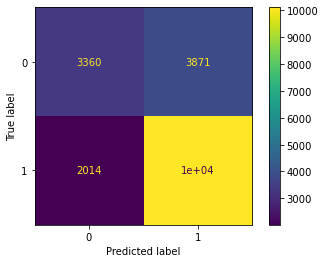

In [91]:
plot_confusion_matrix(estimator=xgb_best, y_true = Y_validate, X = X_validate)

### Создание таблицы для передачи результата:

In [92]:
answer = pd.DataFrame({'POLICY_ID' : [], 'POLICY_IS_RENEWED' : [], 'POLICY_IS_RENEWED_PROBABILITY ' : []})
answer

,POLICY_ID,POLICY_IS_RENEWED,POLICY_IS_RENEWED_PROBABILITY


In [97]:
answer['POLICY_ID'] = x_test['POLICY_ID']

In [99]:
proba_lr_test = log_best.predict_proba(x_test)[:, 1]
proba_xgb_test = xgb_best.predict_proba(x_test)[:, 1]

In [100]:
mean_proba_test = (proba_lr_test + proba_xgb_test) / 2

lr_xgb_test_pred = np.round(mean_proba_test, 0).astype('int64')

In [115]:
answer['POLICY_IS_RENEWED']=lr_xgb_test_pred
answer['POLICY_IS_RENEWED_PROBABILITY']=mean_proba_test

In [120]:
answer

,POLICY_ID,POLICY_IS_RENEWED,POLICY_IS_RENEWED_PROBABILITY
9,10,1,0.736609
11,12,1,0.627695
12,13,0,0.383512
21,22,1,0.621604
36,37,1,0.679970
...,...,...,...
96573,96574,1,0.798788
96576,96577,1,0.582174
96585,96586,1,0.788364
96594,96595,1,0.592741


#### Влияние признаков

In [130]:
log_best.coef_.shape

(1, 28)

In [166]:
weights = log_best.coef_
abs_weights = np.abs(weights)

feature_importances = pd.DataFrame({'Features' : list(X_train.columns),
                                    'Weights' : abs_weights[0]}).sort_values(by='Weights', ascending=False)
feature_importances['Weights']=feature_importances['Weights']*100
feature_importances.head()



,Features,Weights
2,POLICY_SALES_CHANNEL,0.702048
21,CLAIM_AVG_ACC_ST_PRD,0.289563
3,POLICY_SALES_CHANNEL_GROUP,0.098793
1,POLICY_BEGIN_MONTH,0.097530
23,POLICY_YEARS_RENEWED_N,0.077896


<AxesSubplot:title={'center':'Влияние признаков на результат предсказания'}, ylabel='Weights'>

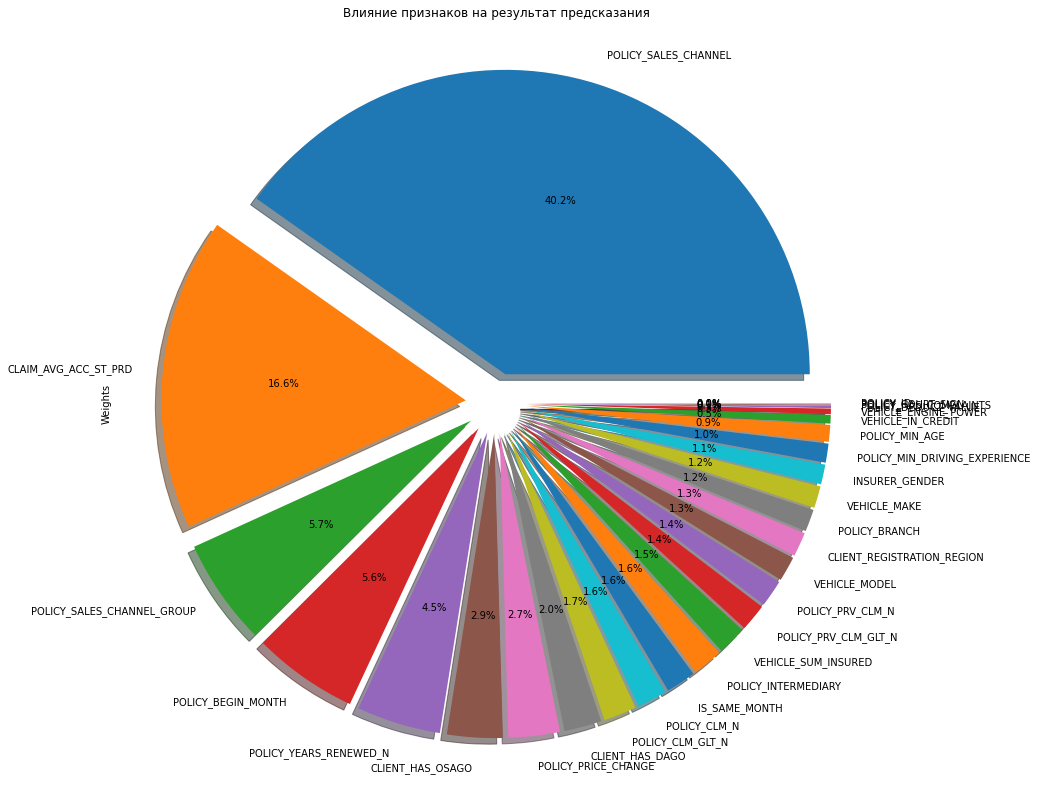

In [167]:
feature_importances[:28].plot.pie(
                             explode=[0.1]*28,
                             labels = feature_importances.Features,
                             y = 'Weights', 
                             autopct='%0.0001f%%', shadow=True, legend=False, figsize=(14, 14), 
                             title='Влияние признаков на результат предсказания')

Как и было выявленно во время EDA - POLICY_SALES_CHANNEL - лучший категоральный признак для определения класса пользователей.

#### Способы по улучшению:
1. Для более детального изучения стоит протестировать более 1-го метода кодирования категориальных данных, масштабирования признаков, проверить качество на валидации и сравнить между моделями для этого можно было бы воспользоваться sklearn.Pipeline() 
2. Можно было бы сгенерировать новые признаки, которые помогли бы улучшить качество линейной модели (Логистической регрессии)
3. Для перестраховки стоило бы сделать более точный train_test_split , который проверял бы качество разбиения с помощью бинарного классификатора: Пример функцции: 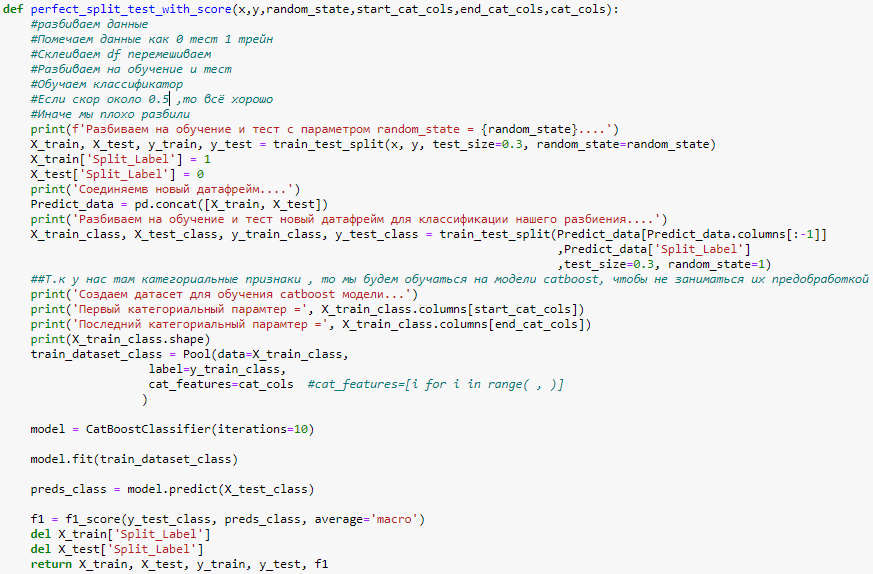
4. В матрице ошибок видно, что у нас довольно много ложно-положительных объектов, с точки зрения модели, такое лучше регулировать. С точки зрения бизнеса - поиск нового клиента значительно дороже, чем удержание старого, поэтому данное смещение покажет лучший результат в реальности. Для улучшения можно было бы найти отношение по затратам на привлечение нового пользователя и удержание и тем самым контролировать гиперпараметр линейной модели.

